# INTERACTIVE ESSAY - TRUMP FOUND GUILTY

The purpose of this brief interactive essay is to demonstrate the potential of _Jupyter Notebooks_ in **effectively** communicating diverse types of information.

## 📚 Contents

1. **✨ Introduction**
2. **🔍 Article 1**
3. **🧩 Article 2**
4. **🎉 Brief Sentiment Analysis**
5. **🚀 Conclusion**
6. **🗂️ Bibliography**



##**✨Introduction**
<a id="introduction"></a>

I decided to investigate the parts of speech makeup of two news reports concerning the recent verdict in the New York State v. Donald Trump case, analyzing coverage from Fox News and CNN, the two leading news outlets in the United States.




| News Network | Author(s) | Link |
| --- | --- | --- |
| Fox News | Brooke Singman | [Trump guilty on all counts in New York criminal trial](https://www.foxnews.com/politics/ny-v-trump-jury-verdict-former-presidents-historic-criminal-trial)
| CNN | Jeremy Herb, Lauren del Valle, Kara Scannell | [Trump found guilty in hush money trial](https://edition.cnn.com/2024/05/30/politics/donald-trump-hush-money-trial-verdict/index.html)


Additionally, I utalized the <mark>VADER</mark>
(Valence Aware Dictionary and sEntiment Reasoner) from the Natural Language Tool Kit to explore the sentiment behind each article.



These are tha packages I employed in my research:
```
from bs4 import BeautifulSoup
import requests
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas
```


![trump](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExM3ZpenU5aDBqazBkbGNiczcwNGVwdmp3dWNxdWw5ZnM0OXN0b2g3MCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/A3haYYuP6nu3AEppVk/giphy.gif)



## 🔍 **Article 1**
<a id="code-section-1"></a>
Firstly, I imported the _request_ module in order to scrape the desired Fox News article, and utalised the _BeautifulSoup_ library to make the scraped page more legiable and easier to work with.

In [114]:
from bs4 import BeautifulSoup as bs
import requests

In [115]:
page = requests.get('https://www.foxnews.com/politics/ny-v-trump-jury-verdict-former-presidents-historic-criminal-trial')
interview = bs(page.content, 'html.parser')

In [63]:
content = interview.find_all('p')
print(content)

[<p class="copyright">
      This material may not be published, broadcast, rewritten,
      or redistributed. ©2024 FOX News Network, LLC. All rights reserved.
      Quotes displayed in real-time or delayed by at least 15 minutes. Market data provided by
      <a data-omtr-intcmp="topnav_more_factset" href="https://www.factset.com/">Factset</a>. Powered and implemented by
      <a data-omtr-intcmp="topnav_more_factset_digital_solutions" href="https://www.factset.com/solutions/business-needs/digital-solutions">FactSet Digital Solutions</a>.
      <a data-omtr-intcmp="topnav_more_factset_privacy" href="https://www.factset.com/privacy">Legal Statement</a>. Mutual Fund and ETF data provided by
      <a data-omtr-intcmp="topnav_more_refinitive_info" href="https://lipperalpha.refinitiv.com/">Refinitiv Lipper</a>.
    </p>, <p data-v-b8a95802="">Former President Trump speaks outside the NYC courtroom ahead of closing arguments in his criminal trial.</p>, <p class="speakable">Former President

The following loop extracts the text and strips it from the preceding and following white spaces, leaving the text without unnecessary elements.



In [117]:
only_text = []

for el in content:
  if len(el.getText().strip()) > 0:
    only_text.append(el.getText())

print(only_text)

['\n      This material may not be published, broadcast, rewritten,\n      or redistributed. ©2024 FOX News Network, LLC. All rights reserved.\n      Quotes displayed in real-time or delayed by at least 15 minutes. Market data provided by\n      Factset. Powered and implemented by\n      FactSet Digital Solutions.\n      Legal Statement. Mutual Fund and ETF data provided by\n      Refinitiv Lipper.\n    ', 'Former President Trump speaks outside the NYC courtroom ahead of closing arguments in his criminal trial.', 'Former President Trump was found guilty on all counts in his historic and unprecedented criminal trial, making him the first former president of the United States to be convicted of a crime.\xa0', 'Manhattan District Attorney Alvin Bragg charged former President Donald Trump with 34 counts of falsifying business records in the first degree.', 'Trump pleaded not guilty to all counts.', 'Jurors found the former president guilty on all counts.', 'LIVE UPDATES: TRUMP VERDICT\xa0'

This line of code takes the list *only_text*, converts each element of the list to a string (if they are not already strings), and then concatenates them into a single string without any separator between them.

Next, the nltk library's tokenization function splits the string into individual tokens (words).

In [65]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [118]:
joined_text = ''.join(map(str,only_text))
tokenized_text = nltk.word_tokenize(joined_text)
print(tokenized_text)

['This', 'material', 'may', 'not', 'be', 'published', ',', 'broadcast', ',', 'rewritten', ',', 'or', 'redistributed', '.', '©2024', 'FOX', 'News', 'Network', ',', 'LLC', '.', 'All', 'rights', 'reserved', '.', 'Quotes', 'displayed', 'in', 'real-time', 'or', 'delayed', 'by', 'at', 'least', '15', 'minutes', '.', 'Market', 'data', 'provided', 'by', 'Factset', '.', 'Powered', 'and', 'implemented', 'by', 'FactSet', 'Digital', 'Solutions', '.', 'Legal', 'Statement', '.', 'Mutual', 'Fund', 'and', 'ETF', 'data', 'provided', 'by', 'Refinitiv', 'Lipper', '.', 'Former', 'President', 'Trump', 'speaks', 'outside', 'the', 'NYC', 'courtroom', 'ahead', 'of', 'closing', 'arguments', 'in', 'his', 'criminal', 'trial.Former', 'President', 'Trump', 'was', 'found', 'guilty', 'on', 'all', 'counts', 'in', 'his', 'historic', 'and', 'unprecedented', 'criminal', 'trial', ',', 'making', 'him', 'the', 'first', 'former', 'president', 'of', 'the', 'United', 'States', 'to', 'be', 'convicted', 'of', 'a', 'crime', '.', 

However, I decided focus souly on the lexicon, and filtered out puncuation using list comprehention.
~~-,."[]{}()\/?~~

In [67]:
tokenized_text = [word for word in tokenized_text if word.isalnum()]

After creating the desired list of tokens, the next loop pairs each word with its specific tag, and stores them in a list of tuples, in the sequence (token, tag).

In [68]:
tuples = []

for sentence in tokenized_text:
  tokens = nltk.word_tokenize(sentence)
  pos_tagged = nltk.pos_tag(tokens)
  for item in pos_tagged:
    tuples.append(item)


Finally, to see the frequency with which each tag occurs, the next loop stores the tag as the key, and every time it comes up, the value is updated.



In [104]:
counter_dic = {}

for el in tuples:
  tag = el[1]
  if tag not in counter_dic:
    counter_dic[tag] = 1
  else:
    counter_dic[tag] += 1
print(*(f"{x}:{y}" for x,y in counter_dic.items()), sep=", " )

DT:205, NN:568, MD:16, RB:74, VB:38, VBN:81, CC:69, NNS:134, IN:202, JJS:4, CD:33, NNP:74, JJ:72, PRP$:36, VBD:74, VBG:32, PRP:79, TO:54, VBZ:35, WRB:2, WP:7, EX:1, JJR:2, VBP:2, RBR:3, WDT:2


For clarity, I initially displayed the data in a table format using _pandas_. I ordered the data in a descending order, by the values, namely the frequency with which each part of speech occurs.

In [110]:
import pandas as pd
sorted_items = sorted(counter_dic.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(list(sorted_items), columns=['Key', 'Value'])
print(df)

     Key  Value
0     NN    568
1     DT    205
2     IN    202
3    NNS    134
4    VBN     81
5    PRP     79
6     RB     74
7    NNP     74
8    VBD     74
9     JJ     72
10    CC     69
11    TO     54
12    VB     38
13  PRP$     36
14   VBZ     35
15    CD     33
16   VBG     32
17    MD     16
18    WP      7
19   JJS      4
20   RBR      3
21   WRB      2
22   JJR      2
23   VBP      2
24   WDT      2
25    EX      1


After storing the keys and values in separate lists, they were plotted on bar charts using the _matplotlib.pyplot_ library. For the data to be more legible, I have divided them into two separate charts. Additionally, the pie chart shows just how much of the lexis each part of speech makes up.

In [70]:
import matplotlib.pyplot as plt
keys = []
values = []

for el in counter_dic:
  keys.append(el)
  values.append(counter_dic[el])

<BarContainer object of 16 artists>

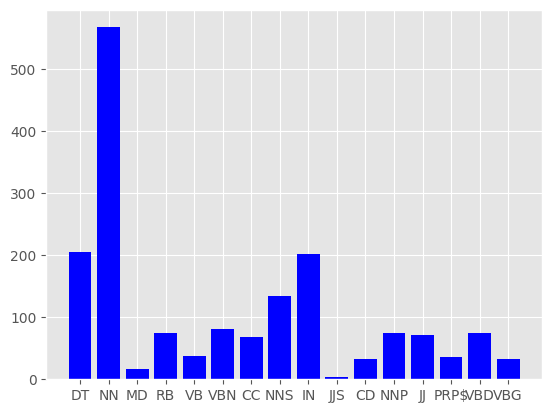

In [106]:
plt.bar(keys[0:16], values[0:16], color = 'blue')

<BarContainer object of 9 artists>

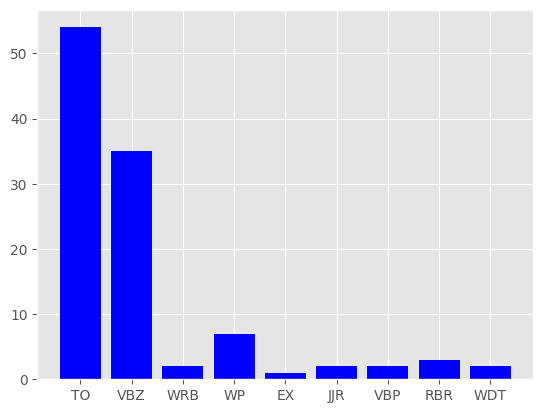

In [111]:
plt.bar(keys[17:], values[17:], color = 'blue')

([<matplotlib.patches.Wedge at 0x7ad2d2b5eb00>,
 [Text(1.0373452999086592, 0.36594361417766846, 'DT'),
  Text(-0.051844308286596516, 1.0987775788112373, 'NN'),
  Text(-0.9334309959812359, 0.5819850305132241, 'MD'),
  Text(-1.0094360734404266, 0.4370798710043438, 'RB'),
  Text(-1.0726803921342667, 0.24363246157003798, 'VB'),
  Text(-1.0996146724997824, 0.029113090237840332, 'VBN'),
  Text(-1.0730820169700352, -0.24185736469150798, 'CC'),
  Text(-0.933431087932038, -0.581984883035644, 'NNS'),
  Text(-0.4858034432891101, -0.9869118575072673, 'IN'),
  Text(-0.12800350741698915, -1.0925269342624688, 'JJS'),
  Text(-0.06093131021398501, -1.0983111469140279, 'CD'),
  Text(0.13342401531936515, -1.0918782130512807, 'NNP'),
  Text(0.3907196684149292, -1.028269488370499, 'JJ'),
  Text(0.5672436109478685, -0.9424620341630868, 'PRP$'),
  Text(0.7284389550584214, -0.8242431005191341, 'VBD'),
  Text(0.8610671494393345, -0.6845168837628617, 'VBG'),
  Text(0.9715838467928776, -0.5157759481123121, 'PRP'

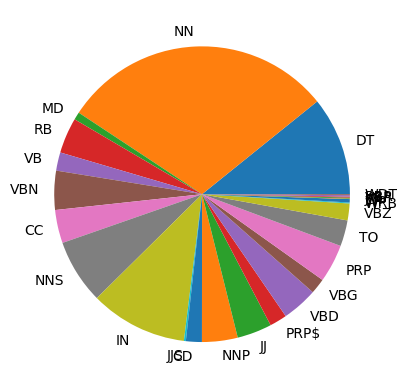

In [73]:
plt.pie(values,labels = keys)

## 🧩  **Article 2**
<a id="code-section-2"></a>
The analysis of the CNN article was conducted in an identical way as above.

In [116]:
page = requests.get('https://edition.cnn.com/2024/05/30/politics/donald-trump-hush-money-trial-verdict/index.html')
interview2 = bs(page.content, 'html.parser')

In [15]:
content2 = interview2.find_all('p')
print(content)

[<p class="copyright">
      This material may not be published, broadcast, rewritten,
      or redistributed. ©2024 FOX News Network, LLC. All rights reserved.
      Quotes displayed in real-time or delayed by at least 15 minutes. Market data provided by
      <a data-omtr-intcmp="topnav_more_factset" href="https://www.factset.com/">Factset</a>. Powered and implemented by
      <a data-omtr-intcmp="topnav_more_factset_digital_solutions" href="https://www.factset.com/solutions/business-needs/digital-solutions">FactSet Digital Solutions</a>.
      <a data-omtr-intcmp="topnav_more_factset_privacy" href="https://www.factset.com/privacy">Legal Statement</a>. Mutual Fund and ETF data provided by
      <a data-omtr-intcmp="topnav_more_refinitive_info" href="https://lipperalpha.refinitiv.com/">Refinitiv Lipper</a>.
    </p>, <p data-v-b8a95802="">Former President Trump speaks outside the NYC courtroom ahead of closing arguments in his criminal trial.</p>, <p class="speakable">Former President

In [16]:
only_text2 = []

for el in content2:
  if len(el.getText().strip()) > 0:
    only_text2.append(el.getText())

print(only_text2)

['\n            A Manhattan jury found Donald Trump guilty of all 34 charges\xa0of falsifying business records Thursday, an unprecedented and historic verdict that makes Trump the first former president in American history to be convicted of a felony.\n    ', '\n            Not only is Trump the first former president to be found guilty of a felony, he’s also the first major-party presidential nominee to be convicted of a crime in the midst of a campaign for the White House.\xa0And if he defeats President Joe Biden in November, he will be the first sitting president in history to be a convicted felon.\n    ', '\n            The verdict in the hush money trial was announced after jurors deliberated for nearly 12 hours over two days.\n    ', '\nRelated article\nWhat are your questions about Trump’s conviction?\n', '\n            It will ultimately be up to voters in November to decide the significance of the guilty verdict delivered by 12 ordinary New Yorkers, which, on a legal basis, do

In [17]:

keys2 = []
values2 = []

for el in counter_dic:
  keys.append(el)
  values.append(counter_dic[el])

In [18]:
joined_text2 = ''.join(map(str,only_text2))
tokenized_text2 = nltk.word_tokenize(joined_text2)

Next, I decided to strip the text of punctuation.

In [47]:
tokenized_text2 = [word for word in tokenized_text2 if word.isalnum()]

In [52]:
tuples2 = []

for sentence in tokenized_text2:
  tokens = nltk.word_tokenize(sentence)
  pos_tagged = nltk.pos_tag(tokens)
  for item in pos_tagged:
    tuples2.append(item)

In [112]:
counter_dic2 = {}

for el in tuples2:
  tag = el[1]
  if tag not in counter_dic2:
    counter_dic2[tag] = 1
  else:
    counter_dic2[tag] += 1
print(*(f"{x}:{y}" for x,y in counter_dic2.items()), sep=", " )

DT:107, NNP:36, NN:237, JJ:44, IN:100, CD:22, NNS:47, VBG:27, CC:18, VBZ:14, RB:34, TO:32, VB:14, VBN:22, PRP:20, MD:6, VBD:29, WP:5, VBP:1, PRP$:9, WDT:1, WRB:5, EX:1, JJR:1


In [113]:
sorted_items = sorted(counter_dic2.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(list(sorted_items), columns=['Key', 'Value'])
print(df)

     Key  Value
0     NN    237
1     DT    107
2     IN    100
3    NNS     47
4     JJ     44
5    NNP     36
6     RB     34
7     TO     32
8    VBD     29
9    VBG     27
10    CD     22
11   VBN     22
12   PRP     20
13    CC     18
14   VBZ     14
15    VB     14
16  PRP$      9
17    MD      6
18    WP      5
19   WRB      5
20   VBP      1
21   WDT      1
22    EX      1
23   JJR      1


In [54]:
keys2 = []
values2 = []

for el in counter_dic2:
  keys2.append(el)
  values2.append(counter_dic2[el])

<BarContainer object of 14 artists>

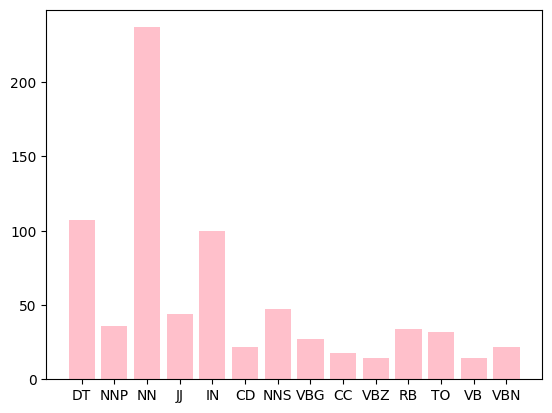

In [58]:
plt.bar(keys2[0:14], values2[0:14], color = 'pink')

<BarContainer object of 9 artists>

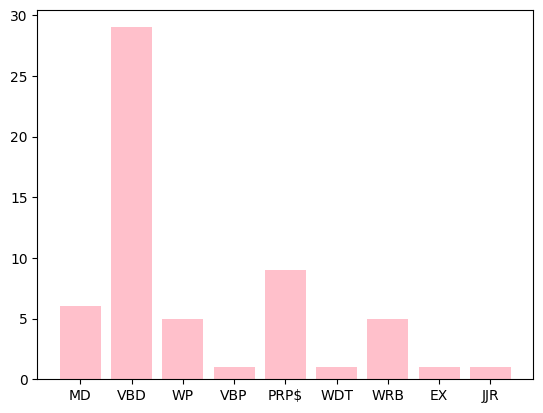

In [59]:
plt.bar(keys2[15:24], values2[15:24], color = 'pink')

([<matplotlib.patches.Wedge at 0x7ad2d2fe39d0>,
 [Text(1.0114339040968279, 0.4324366515958715, 'DT'),
  Text(0.6452189273929548, 0.8908942337527418, 'NNP'),
  Text(-0.4324366989445092, 1.0114338838530061, 'NN'),
  Text(-1.0938577635184967, 0.11608269978904152, 'JJ'),
  Text(-0.9961569629535527, -0.4665525749142904, 'IN'),
  Text(-0.6849105021252644, -0.8607540903640936, 'CD'),
  Text(-0.4400624356780371, -1.00813940142478, 'NNS'),
  Text(-0.14495129303077067, -1.0904077781493984, 'VBG'),
  Text(0.0415256915548689, -1.099215910065393, 'CC'),
  Text(0.17371876408197298, -1.0861960186843957, 'VBZ'),
  Text(0.3666655399162003, -1.0370903441060288, 'RB'),
  Text(0.6111273312500712, -0.9146165234671665, 'TO'),
  Text(0.7599974148878197, -0.7952382846441884, 'VB'),
  Text(0.8607541063955811, -0.6849104819778603, 'VBN'),
  Text(0.958117673318818, -0.5403799811929888, 'PRP'),
  Text(1.0064705759388073, -0.4438659479723645, 'MD'),
  Text(1.0561839180282189, -0.3073687220563614, 'VBD'),
  Text(1.

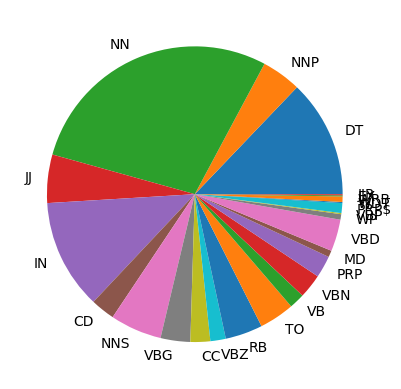

In [60]:
plt.pie(values2,labels = keys2)

## 🎉 **Breif Sentiment Analysis**
<a id="code-section-3"></a>

Additionally, I investigated the overall sentiment of each article using VADER, suspecting that the Fox News article would be more negative, due to their close connection with the former president and the unfavorable verdict.

In [92]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [93]:
# Article 1
sia.polarity_scores(str(only_text))

{'neg': 0.087, 'neu': 0.863, 'pos': 0.05, 'compound': -0.9975}

In [94]:
#Article 2
sia.polarity_scores(str(only_text2))

{'neg': 0.084, 'neu': 0.881, 'pos': 0.034, 'compound': -0.9931}


**_SENTIMENT ANALYSIS RESULTS_**

| News Network | Compound |
| --- | --- |
| Fox News | -0.9975 |
| CNN | -0.9931 |


The difference in sentiment is so marginal, that one is unable to determine anything of value.

## 🚀**Conclusion**
<a id="conclusion"></a>

Based on the provided findings from the two articles, one can draw some basic conclusions about the usage of different parts of speech in each article:

**Dominant Parts of Speech:**
- Most frequeent POS

  - Article 1: The most frequently occurring parts of speech are nouns (**NN**) with 568 occurrences, followed by determiners (**DT**) with 205 occurrences. Nouns and determiners seem to be heavily used in Article 1.
  - Article 2: Similarly, in Article 2, nouns (**NN**) are the most frequent, with 237 occurrences, followed by determiners (**DT**) with 107 occurrences. Again, nouns and determiners are prominently used in Article 2.

- Variation in Verb Forms:

  - Article 1: Verbs appear in various forms, including past participle (**VBN**), base form (**VB**), past tense (**VBD**), and present tense (**VBZ, VBP**). This suggests a diverse range of verb usage in Article 1.
  - Article 2: Verb usage in Article 2 is less varied compared to Article 1, with fewer verb forms observed.

- Comparative and Superlative Forms:

  - Comparative (**JJR**) and superlative (**JJS**) adjective forms are used in Article 1, indicating comparisons or degrees of comparison.

**Sentiment Analysis:**

- Article 1: The sentiment analysis using NLTK's VADER Sentiment Intensity Analyzer indicates a  negative sentiment with a compound score of -0.9975. The negative sentiment score (**neg**) is 0.087, the neutral score (**neu**) is 0.863, and the positive score (**pos**) is 0.05.

- Article 2: Similarly, the sentiment analysis using NLTK's VADER Sentiment Intensity Analyzer shows a slightly negative sentiment with a compound score of -0.9931. The negative sentiment score (**neg**) is 0.084, the neutral score (**neu**) is 0.881, and the positive score (**pos**) is 0.034.

Although the news networks are unoffcially affiliated with opposing political parties, neither the sentiment analysis nor the POS analysis reveals any substantial differences. Further research and contextual interpretation are necessary to fully understand the content and implications of the articles written by Fox News and CNN concerning Donald Trump.


## 🗂️Bibliography:
<a id="bibliography"></a>

- Herb Jeremy,  del Valle Lauren,  ScannellKara. 2024. 'Trump found guilty in hush money trial'. Text.Artticle. CNN. 30 May 2024. https://edition.cnn.com/2024/05/30/politics/donald-trump-hush-money-trial-verdict/index.html

- Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

- Singman, Brooke. 2024. ‘Trump Guilty on All Counts in New York Criminal
Trial’. Text.Article. Fox News. Fox News. 28 May 2024. https://www.foxnews.com/politics/ny-v-trump-jury-verdict-former-presidents-historic-criminal-trial.
